O objetivo é receber um ficheiro CSV que representa um conjunto de pontos que representa o simbolo Yin Yang e determinar quantos pontos estão na região Yin!

Depois de algumas pesquisas, verifiquei que um algoritmo adequado seria o **DBSCAN**.


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de agrupamento baseado em densidade que é capaz de identificar clusters em um conjunto de dados com base na densidade local de pontos. Ele não requer que o número de clusters seja especificado a priori e é capaz de identificar clusters de diferentes formas e tamanhos.

Aqui está uma visão geral simplificada do funcionamento do algoritmo DBSCAN:

* **Parâmetros**:
    * **eps**: é a distância máxima entre dois pontos para que eles sejam considerados vizinhos.
    * **min_samples**: é o número mínimo de pontos dentro da vizinhança de um ponto para que ele seja considerado um núcleo de cluster.

* **Etapa 1: Identificação de Núcleos de Cluster:**
O algoritmo começa selecionando um ponto aleatório do conjunto de dados. Ele verifica quantos pontos estão dentro da distância eps desse ponto. Se houver pelo menos min_samples pontos dentro dessa vizinhança, o ponto é considerado um núcleo de cluster.

* **Etapa 2: Expansão do Cluster:**
Para cada núcleo de cluster encontrado, o algoritmo expande o cluster adicionando todos os pontos que estão dentro da distância eps do núcleo. Ele continua a expandir o cluster até que não haja mais pontos dentro da distância eps ou até que todos os pontos dentro da distância eps sejam visitados.

* **Etapa 3: Classificação dos Pontos:**
Depois que todos os clusters são identificados, os pontos que não pertencem a nenhum cluster são considerados outliers.

Ajustar os valores de **eps** e **min_samples** pode afetar significativamente os resultados do agrupamento. Valores maiores de eps resultarão em clusters mais amplos, enquanto valores menores de eps resultarão em clusters mais densos. O parâmetro min_samples controla a sensibilidade do algoritmo à densidade dos clusters.



Desta forma, criei a função 'yin_yang_clousteringDBSCAN' que recebe o caminho do ficheiro CSV, o valor de eps, o valor de min_samples, a região que pretendemos obter o numero de pontos (0 para o yin,  1 para o yang e 2 para os outliers) e se pretende ou não visualizar a representação gráfica do clouster!

Esta função cumpre o objetivo com sucesso!!


In [1]:
import pandas as pd #para carregar arquivos csv
import math
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#/content/drive/MyDrive/2_partitioned_points.csv
def yin_yang_clousteringDBSCAN(path, eps, min_samples, output, figure_representation=False):
  #ler o conjunto de dados
  points = pd.read_csv(path)

  # Converter para array numpy
  x_y_points = np.array(list(zip(points['x'], points['y']))) #guardar o pontos em um array de tuplas (x,y)

  # Aplicar o algoritmo DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=min_samples)
  dbscan.fit(x_y_points)

  # Obter os rótulos dos clusters (2 para outliers)
  labels = dbscan.labels_
  #print(np.unique(labels))

  # Identificar os pontos yin e yang com base nos rótulos
  yin_points = x_y_points[labels == 0]
  yang_points = x_y_points[labels == 1]
  outliers = x_y_points[labels == 2]

  if figure_representation:
    # Criar o gráfico
    plt.figure(figsize=(8, 6))  # Tamanho opcional da figura
    plt.scatter(yin_points[:, 0], yin_points[:, 1], color='red', label='Yin')
    plt.scatter(yang_points[:, 0], yang_points[:, 1], color='blue', label='Yang')
    plt.scatter(outliers[:, 0], outliers[:, 1], color='black', label='out')
    plt.title('Gráfico de Pontos Yin Yang (DBSCAN)')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()  # Adiciona a legenda
    plt.show()

  if output==0:
    return f"Number of Yin points:{len(yin_points)}"
  elif output==1:
    return f"Number of Yang points:{len(yang_points)}"
  elif output==2:
    return f"Number of outliers points:{len(outliers)}"
  else:
    return "The output needs to be 0,1 or 2!"


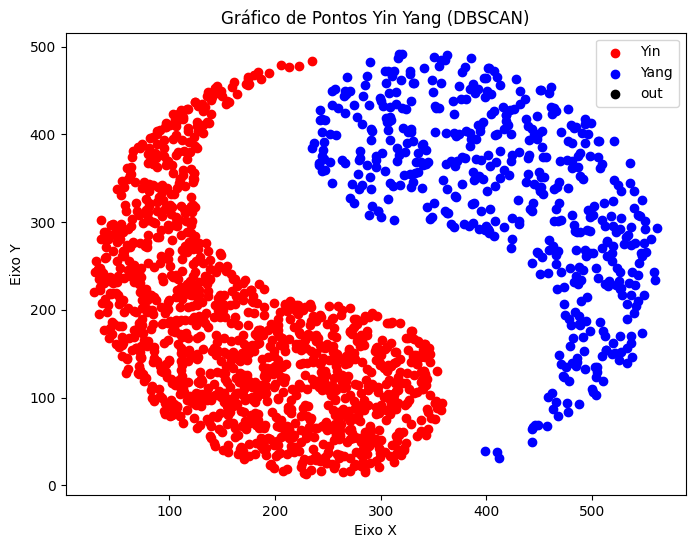

'Number of Yin points:1250'

In [3]:
yin_yang_clousteringDBSCAN('/content/drive/MyDrive/DataScience_problems/coding-challenges/2_partitioned_points.csv', 36, 1, 0, figure_representation=True)

Também criei uma função semelhante à anterior só que utilizando o algoritmo **k-means**. o resultado da aplicação deste algoritmo é insatisfatório pois agrupa mal as regiões, uma vez que é um algorimo que não lida bem com pontos com formatos diferentes de circulos (neste caso são tipo duas meias luas)

In [4]:
def yin_yang_clousteringKMEAN(path, output, figure_representation=False):
  #ler o conjunto de dados
  points = pd.read_csv(path)

  # Converter para array numpy
  x_y_points = np.array(list(zip(points['x'], points['y']))) #guardar o pontos em um array de tuplas (x,y)

  # Aplicar o algoritmo k_means
  kmeans = KMeans(n_clusters=2, random_state=0)
  kmeans.fit(x_y_points)

  # Obter os centróides dos clusters
  centroids = kmeans.cluster_centers_

  #Determinar os clousters
  yin_points = x_y_points[kmeans.labels_ == np.argmin(centroids[:, 1])]
  yang_points = x_y_points[kmeans.labels_ == np.argmax(centroids[:, 1])]



  if figure_representation:
    # Criar o gráfico
    plt.figure(figsize=(8, 6))  # Tamanho opcional da figura
    plt.scatter(yin_points[:, 0], yin_points[:, 1], color='red', label='Yin')
    plt.scatter(yang_points[:, 0], yang_points[:, 1], color='blue', label='Yang')
    plt.title('Gráfico de Pontos Yin Yang')
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.legend()  # Adiciona a legenda
    plt.show()

  if output==0:
    return f"Number of Yin points:{len(yin_points)}"
  elif output==1:
    return f"Number of Yang points:{len(yang_points)}"
  else:
    return "The output needs to be 0 or 1!"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


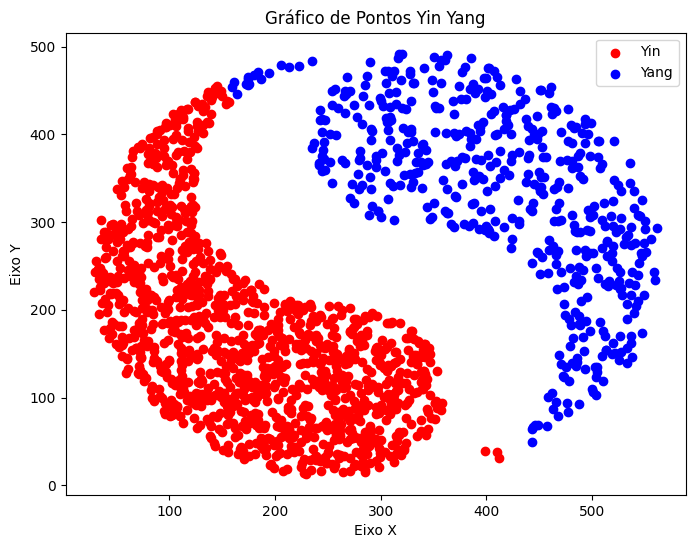

Number of Yin points:1237


In [5]:
print(yin_yang_clousteringKMEAN('/content/drive/MyDrive/DataScience_problems/coding-challenges/2_partitioned_points.csv', 0, figure_representation=True))